In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [1]:
# Pega os preços do BTC do yahoo finance
get = yf.Ticker("BTC-USD")

btc_price_data = yf.download("BTC-USD", start="2009-01-01")

# Concerta o cabeçalho
btc_price_data = btc_price_data.reset_index()

# Convert dates to Unix timestamps
btc_price_data["Date"] = pd.to_datetime(btc_price_data["Date"])
btc_price_data['numeric_date'] = (btc_price_data['Date'] - btc_price_data['Date'].min()).dt.days
btc_price_data["Date"] = btc_price_data["Date"].dt.date

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'BTC Price'}>

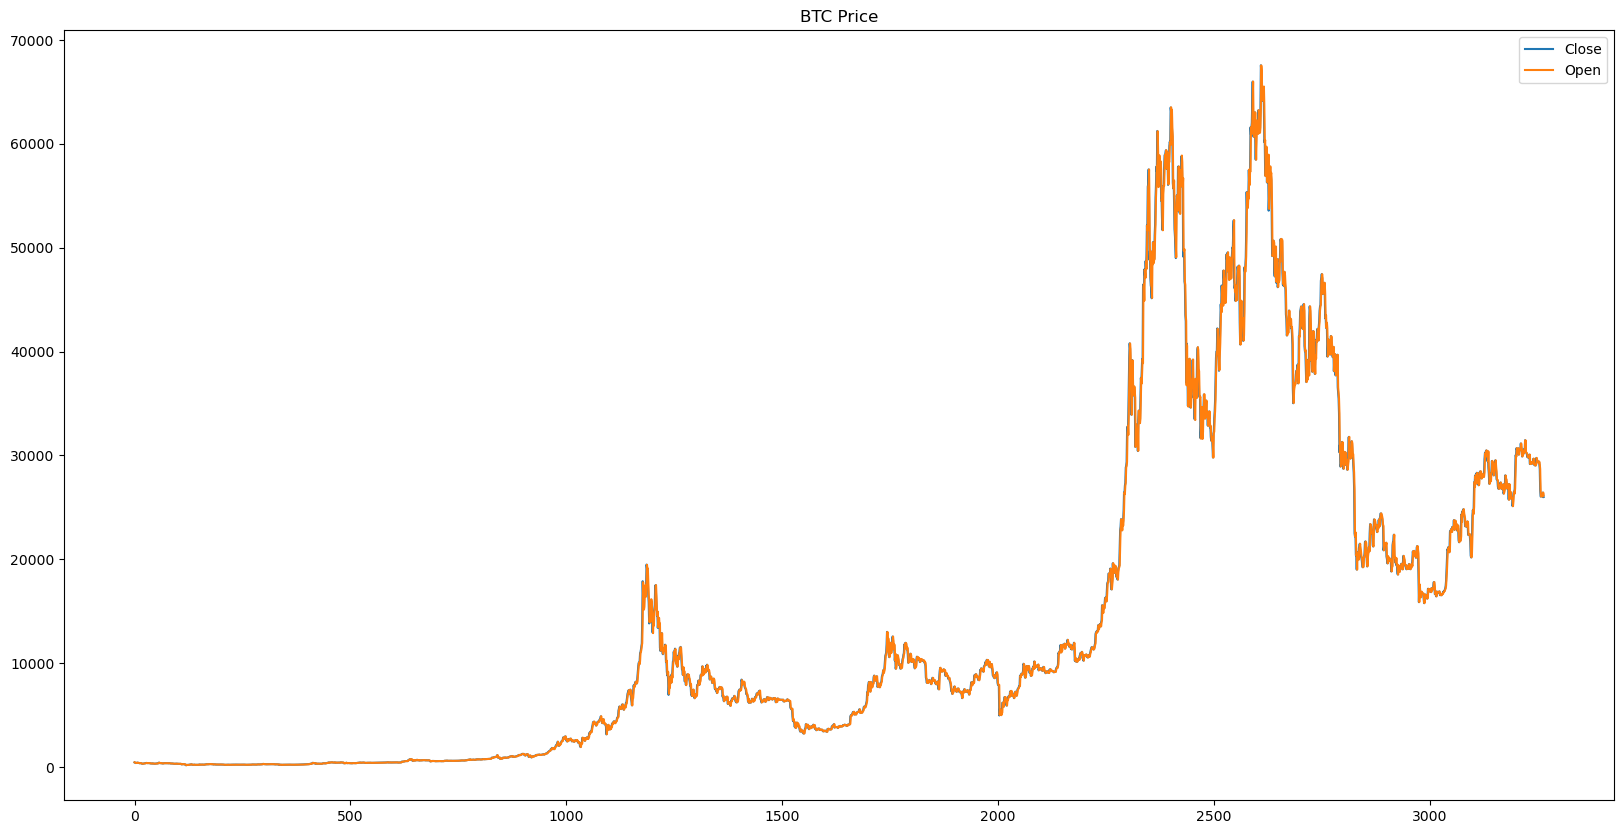

In [2]:
# plot whole btc_ptice_data withowt volume
btc_price_data[["Close", "Open"]].plot(figsize=(20,10), title="BTC Price")

# ARIMA
### Decomposition ETS (error, trend and seasonality)

/tmp/ipykernel_7579/2645769995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data["Date"] = pd.to_datetime(plot_data["Date"])


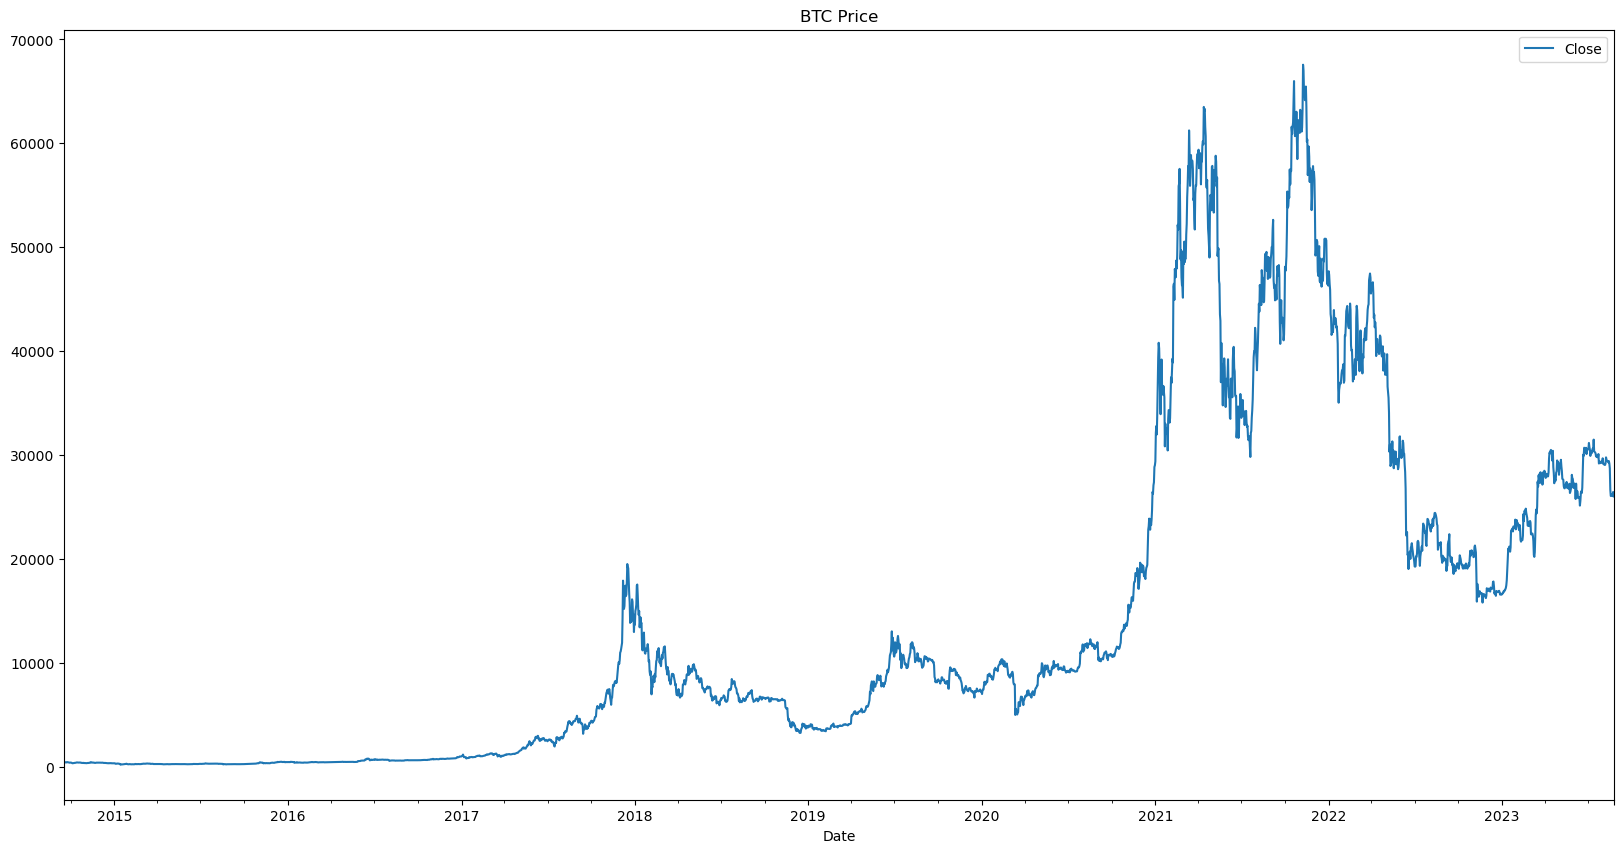

In [23]:
plot_data = btc_price_data[["Date","Close"]]
plot_data["Date"] = pd.to_datetime(plot_data["Date"])
plot_data = plot_data.set_index("Date")
plot_data.plot(figsize=(20,10), title="BTC Price")
plt.show()

In [47]:
result = seasonal_decompose(plot_data["Close"], model='multiplicative')


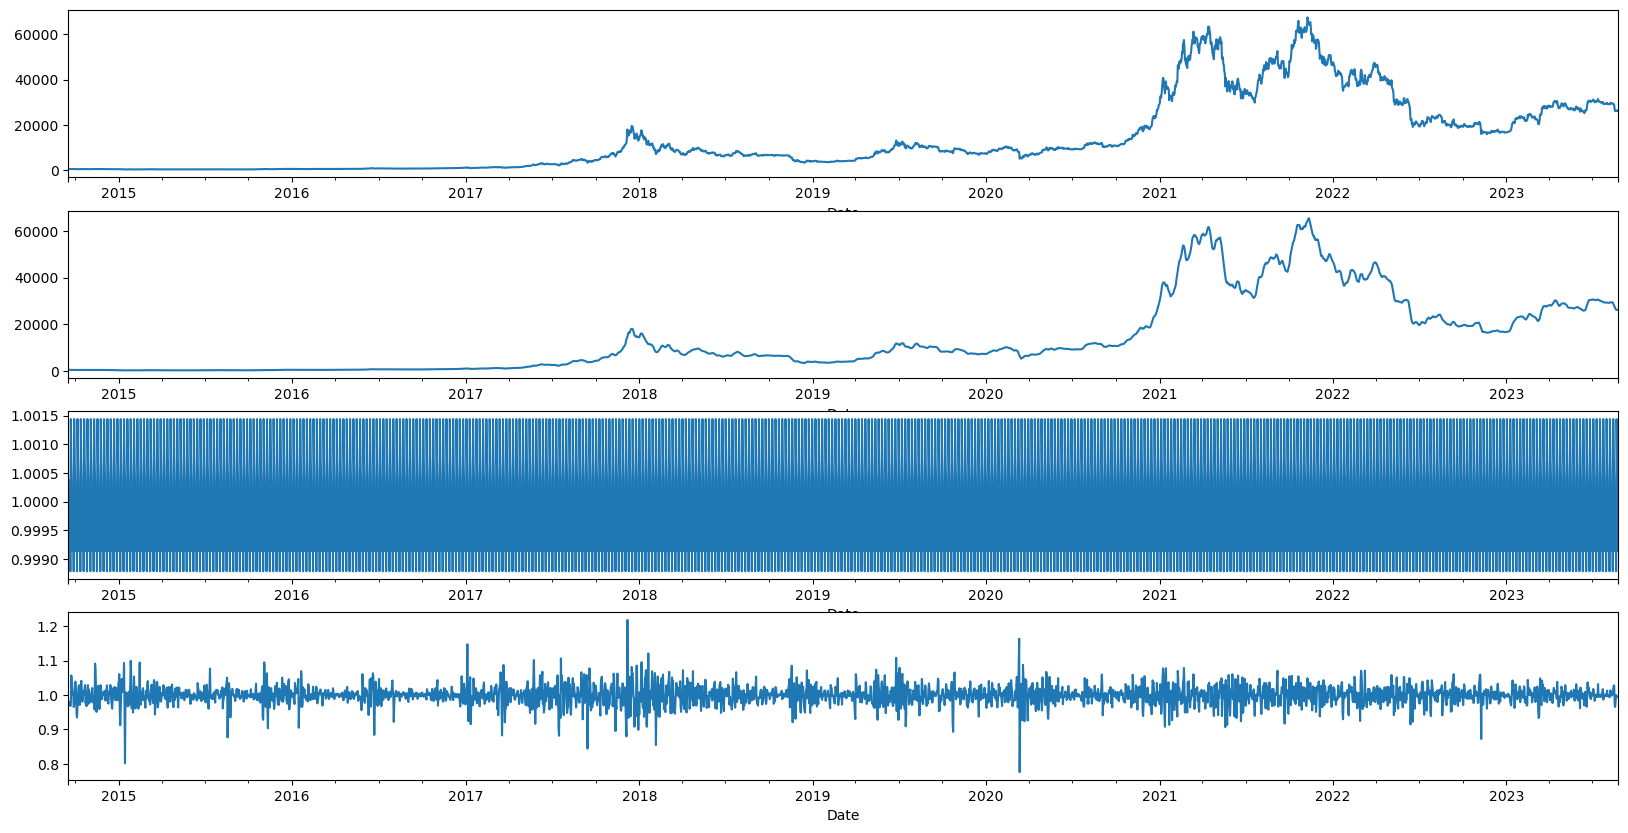

In [48]:
# plot result of seasonal_decompose in big image
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,10))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)
plt.show()

In [49]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_model = auto_arima(plot_data["Close"], start_p=1,max_p=10, start_q=1, max_q=10, max_d=10, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)